# importing packages and libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import tensorflow as tf





# importing Datasets

In [3]:
df1 = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\project\\True.csv", encoding='latin1',
                  on_bad_lines='skip') 
df1

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
df2 = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\project\\Fake (1).csv",encoding='latin-1', on_bad_lines='skip')  
df2

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23457,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23458,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23459,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23460,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
# Concatenate the datasets
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44868,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44869,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44870,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44871,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
df3 = df3[['title', 'text', 'subject', 'date']]
df3

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44868,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44869,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44870,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44871,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# EDA 

In [7]:
df3.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df3.tail()

,title,text,subject,date
44868,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44869,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44870,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44871,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
44872,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [9]:
df3.shape

(44873, 4)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44873 entries, 0 to 44872
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44873 non-null  object
 1   text     44871 non-null  object
 2   subject  44871 non-null  object
 3   date     44870 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [10]:
df3.describe()

,title,text,subject,date
count,44873,44871,44871,44870
unique,38714,38629,9,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,14,627,11266,182


In [11]:
df3.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
44868,False,False,False,False
44869,False,False,False,False
44870,False,False,False,False
44871,False,False,False,False


In [12]:
missing_values = df3.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 title      0
text       2
subject    2
date       3
dtype: int64


In [13]:
df3.fillna("<MISSING>", inplace=True)

In [14]:
missing_values = df3.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 title      0
text       0
subject    0
date       0
dtype: int64


In [15]:
duplicate_records = df3[df3.duplicated()]
print("Duplicate records:", duplicate_records)


Duplicate records:                                                    title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
21347  Thailand's ousted PM Yingluck has fled abroad:...   
21402  U.S., North Korea clash at U.N. forum over nuc...   
31348  HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...   
32850  FORMER DEMOCRAT WARNS Young Americans: Rioter...   
36327  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892    WASHINGTON (Reuters) - U.S. Hou

In [16]:
text=df3["text"]
text

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
44868    21st Century Wire says As 21WIRE reported earl...
44869    21st Century Wire says It s a familiar theme. ...
44870    Patrick Henningsen  21st Century WireRemember ...
44871    21st Century Wire says Al Jazeera America will...
44872    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44873, dtype: object

In [17]:
df3 = df3.drop_duplicates()


In [18]:
duplicate_records = df3[df3.duplicated()]
print("Duplicate records:", duplicate_records)

Duplicate records: Empty DataFrame
Columns: [title, text, subject, date]
Index: []


# applying tokenization

In [26]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [27]:
# Apply the tokenization function to the 'text' column
df3['tokenized_text'] = df3['text'].apply(tokenize_text)

df3['tokenized_text']

C:\Users\shash\AppData\Local\Temp\ipykernel_22348\3551721901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tokenized_text'] = df3['text'].apply(tokenize_text)


0        [WASHINGTON, (, Reuters, ), -, The, head, of, ...
1        [WASHINGTON, (, Reuters, ), -, Transgender, pe...
2        [WASHINGTON, (, Reuters, ), -, The, special, c...
3        [WASHINGTON, (, Reuters, ), -, Trump, campaign...
4        [SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...
                               ...                        
44868    [21st, Century, Wire, says, As, 21WIRE, report...
44869    [21st, Century, Wire, says, It, s, a, familiar...
44870    [Patrick, Henningsen, 21st, Century, WireRemem...
44871    [21st, Century, Wire, says, Al, Jazeera, Ameri...
44872    [21st, Century, Wire, says, As, 21WIRE, predic...
Name: tokenized_text, Length: 44664, dtype: object

In [28]:
# Display the tokenized text for the first few rows
for index, row in df3.head().iterrows():
    print(f"Row {index}:")
    print(row['tokenized_text'])

Row 0:
['WASHINGTON', '(', 'Reuters', ')', '-', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress', ',', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', ',', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', '.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans', ',', 'U.S.', 'Representative', 'Mark', 'Meadows', ',', 'speaking', 'on', 'CBS\x19', 'Face', 'the', 'Nation', ',', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', ',', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January', '.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday', ',', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', '

# stopwords

In [30]:
from nltk.corpus import stopwords

# Example: Remove English stopwords
stopwords_list = set(stopwords.words('english'))
stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [32]:

df3['filtered_tokens']= df3['tokenized_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])

C:\Users\shash\AppData\Local\Temp\ipykernel_22348\1138015291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['filtered_tokens']= df3['tokenized_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])


In [33]:
df3['filtered_tokens']

0        [WASHINGTON, (, Reuters, ), -, head, conservat...
1        [WASHINGTON, (, Reuters, ), -, Transgender, pe...
2        [WASHINGTON, (, Reuters, ), -, special, counse...
3        [WASHINGTON, (, Reuters, ), -, Trump, campaign...
4        [SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...
                               ...                        
44868    [21st, Century, Wire, says, 21WIRE, reported, ...
44869    [21st, Century, Wire, says, familiar, theme, ....
44870    [Patrick, Henningsen, 21st, Century, WireRemem...
44871    [21st, Century, Wire, says, Al, Jazeera, Ameri...
44872    [21st, Century, Wire, says, 21WIRE, predicted,...
Name: filtered_tokens, Length: 44664, dtype: object

In [34]:
# Define additional custom stopwords
custom_stopwords = {'WASHINGTON', 'Reuters', 'head', 'conservation','SEATTLE/WASHINGTON','Transgender','special','Trump','campaign','21st','Century',' Wire','says','21WIRE','reported','familiar',' theme','predicted','Henningsen','said','Said','US'}


In [35]:
# Add custom stopwords to the set
stopwords_list.update(custom_stopwords)

In [36]:
stopwords_list

{' Wire',
 ' theme',
 '21WIRE',
 '21st',
 'Century',
 'Henningsen',
 'Reuters',
 'SEATTLE/WASHINGTON',
 'Said',
 'Transgender',
 'Trump',
 'US',
 'WASHINGTON',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'campaign',
 'can',
 'conservation',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'familiar',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'head',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'm

# Tokenization, Normalization, and Lemmatization

In [37]:
# Tokenization, Normalization, and Lemmatization
lemmatizer = WordNetLemmatizer()

In [38]:
def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text
    # Tokenization
    tokens = word_tokenize(text)
    tokens
    # Normalization
    tokens = [token.lower() for token in tokens]
    tokens
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df3['processed_text'] = df3['text'].apply(process_text)

# Remove stopwords
df3['filtered_tokens'] = df3['processed_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])


C:\Users\shash\AppData\Local\Temp\ipykernel_22348\1008624397.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['processed_text'] = df3['text'].apply(process_text)
C:\Users\shash\AppData\Local\Temp\ipykernel_22348\1008624397.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['filtered_tokens'] = df3['processed_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])


# Data Visualization

In [28]:
# the VADER sentiment analyzer

C:\Users\shash\AppData\Local\Temp\ipykernel_12320\4199082738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
C:\Users\shash\AppData\Local\Temp\ipykernel_12320\4199082738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment_category'] = df3['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


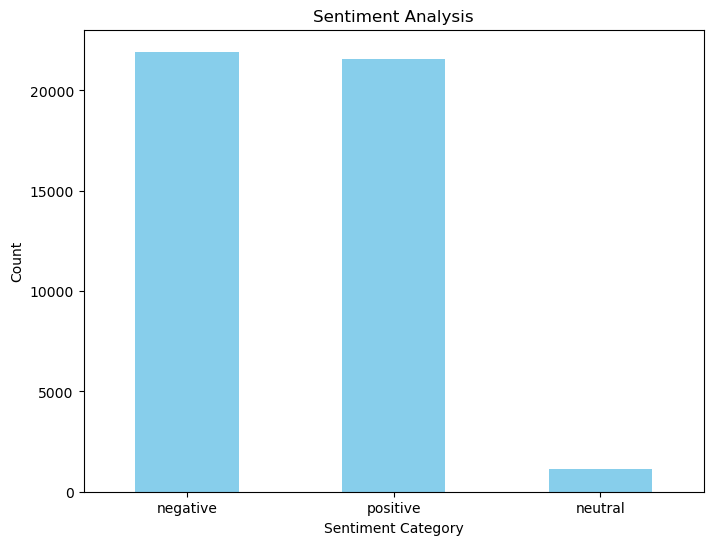

In [20]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text in the DataFrame
df3['sentiment'] = df3['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify sentiment into categories (positive, neutral, negative)
df3['sentiment_category'] = df3['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df3['sentiment_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [30]:
# word cloud

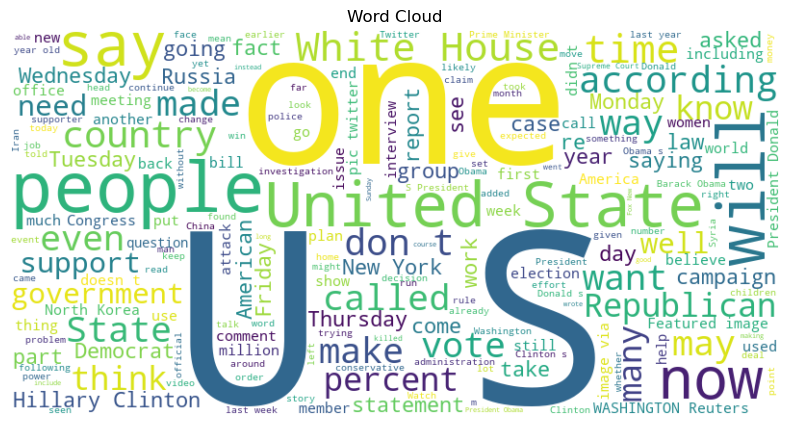

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have your text data stored in a pandas Series called 'df3['text']'
# List of words to be removed
words_to_remove = ['said', 'US', 'Trump']

# Preprocess the text to remove the specified words
cleaned_text = df3['text'].copy()  # Create a copy to avoid modifying the original Series
for word in words_to_remove:
    cleaned_text = cleaned_text.str.replace(word, '')

# Concatenate all the strings in the Series
cleaned_text = cleaned_text.str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud().generate(cleaned_text)

# Display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [31]:
# Data Visualization - Word Cloud
text_data = " ".join(df3['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


KeyboardInterrupt



# Data modelling

# CNN (Convolutional neural network)

In [45]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df3['filtered_tokens'], df3['subject'], test_size=0.2, random_state=42)


In [46]:
# Label encoding for training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Check for unseen labels in test set
unseen_labels = set(y_test) - set(label_encoder.classes_)

if unseen_labels:
    print("Unseen labels in test set:", unseen_labels)
    # Filter out unseen labels from test set
    mask = y_test.isin(label_encoder.classes_)
    X_test_filtered = X_test[mask]
    y_test_filtered = y_test[mask]
else:
    X_test_filtered = X_test
    y_test_filtered = y_test

# Encode filtered test set labels
y_test_encoded = label_encoder.transform(y_test_filtered)

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test_filtered)
max_sequence_length = max([len(seq) for seq in X_train_seq + X_test_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')



In [47]:
# Define CNN model
cnn_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_encoded))


Epoch 1/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 550s 490ms/step - accuracy: 0.6881 - loss: 0.8203 - val_accuracy: 0.8193 - val_loss: 0.3756
Epoch 2/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 552s 494ms/step - accuracy: 0.8438 - loss: 0.3193 - val_accuracy: 0.8043 - val_loss: 0.3754
Epoch 3/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 1037s 928ms/step - accuracy: 0.8537 - loss: 0.2775 - val_accuracy: 0.8169 - val_loss: 0.3993
Epoch 4/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 1026s 919ms/step - accuracy: 0.8629 - loss: 0.2568 - val_accuracy: 0.7721 - val_loss: 0.4210
Epoch 5/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 1829s 2s/step - accuracy: 0.8691 - loss: 0.2373 - val_accuracy: 0.7607 - val_loss: 0.4659


In [48]:
# Evaluate CNN model
cnn_pred = cnn_model.predict(X_test_pad)
cnn_acc = accuracy_score(y_test_encoded, np.argmax(cnn_pred, axis=1))
print("CNN Accuracy:", cnn_acc)
cnn_mse = mean_squared_error(y_test_encoded, np.argmax(cnn_pred, axis=1))
print("CNN Mean Squared Error:", cnn_mse)

280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step
CNN Accuracy: 0.7606627112951976
CNN Mean Squared Error: 1.896563304600918


# Naive Bayes

In [ ]:
# Assuming you have a dataset with 'text' and 'label' columns
X = df3['text']
y = df3['sentiment_category']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluation
print(classification_report(y_test, y_pred))

# Random Forest classifier

In [ ]:
# Assuming you have a dataset with 'text' and 'sentiment_category' columns
# Split the dataset into features (X) and target labels (y)
X = df3['text']
y = df3['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Logistic Regression

In [ ]:
# Assuming you have a dataset with 'text' and 'sentiment_category' columns
# Split the dataset into features (X) and target labels (y)
X = df3['text']
y = df3['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (Logistic Regression in this case)
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# LSTM (Long short team memory)

In [ ]:
# Convert numpy arrays to lists of strings and ensure all elements are strings
X_train_texts = [str(text) for text in X_train.tolist()]
X_test_texts = [str(text) for text in X_test.tolist()]

# Tokenize and pad sequences for LSTM
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_pad, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)
print("LSTM Classification Report:")
print(classification_report(y_test_encoded, y_pred_lstm))

# from the above Data modelling methods we can see that the Random Forest classifier is driving the high accuracy

In [21]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values (NaNs) in the 'text' or 'label' columns
df3 = df3.dropna(subset=['text', 'sentiment_category'])

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df3['text'])
y = df3['sentiment_category']  # Assuming 'label' is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try different kernels like 'rbf' or 'sigmoid'

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8530169036158065

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4382
     neutral       0.92      0.77      0.84       241
    positive       0.84      0.87      0.85      4310

    accuracy                           0.85      8933
   macro avg       0.87      0.83      0.85      8933
weighted avg       0.85      0.85      0.85      8933



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



# Split data into features (X) and labels (y)
X = df3['text']
y = df3['subject']

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences
max_seq_length = max([len(seq) for seq in X_seq])
X_pad = pad_sequences(X_seq, maxlen=max_seq_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Define the neural network model
# Define the neural network model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Decode labels
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Print classification report
print(classification_report(y_test, y_pred_decoded))
